In [1]:
library(tidyverse)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
# read in dataframe 

df <- read_csv("aac_data_cleaned.csv")
df %>% head()

Parsed with column specification:
cols(
  animal_type = col_character(),
  intake_monthyear = col_datetime(format = ""),
  intake_weekday = col_character(),
  `age_upon_intake_(days)` = col_double(),
  intake_condition = col_character(),
  outcome_monthyear = col_datetime(format = ""),
  outcome_weekday = col_character(),
  `age_upon_outcome_(days)` = col_double(),
  total_time_in_shelter_days = col_double(),
  outcome_types = col_character(),
  intake_year = col_double(),
  outtake_year = col_double(),
  intake_month = col_double(),
  outtake_month = col_double()
)


animal_type,intake_monthyear,intake_weekday,age_upon_intake_(days),intake_condition,outcome_monthyear,outcome_weekday,age_upon_outcome_(days),total_time_in_shelter_days,outcome_types,intake_year,outtake_year,intake_month,outtake_month
<chr>,<dttm>,<chr>,<dbl>,<chr>,<dttm>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Dog,2017-12-01,Thursday,3650,Normal,2017-12-01,Thursday,3650,2.9618056,Return to Owner,2017,2017,12,12
Dog,2014-04-01,Wednesday,3650,Normal,2014-04-01,Monday,3650,4.9701389,Transfer,2014,2014,4,4
Dog,2013-11-01,Saturday,5840,Injured,2013-11-01,Saturday,5840,0.1194444,Return to Owner,2013,2013,11,11
Dog,2013-11-01,Saturday,5475,Aged,2013-11-01,Sunday,5475,0.8708333,Return to Owner,2013,2013,11,11
Dog,2014-11-01,Friday,5475,Normal,2014-11-01,Friday,5475,0.1784722,Return to Owner,2014,2014,11,11
Dog,2014-09-01,Monday,5475,Normal,2014-09-01,Monday,5475,0.2131944,Return to Owner,2014,2014,9,9


In [36]:
data_new <- df %>% 
    group_by(intake_monthyear) %>%
    summarise('count' = n()) %>%
    mutate('type' = 'intake',
          'monthyear' = intake_monthyear) 
data_new <- data_new[-1] 
data_new %>% head()

count,type,monthyear
<int>,<chr>,<dttm>
1438,intake,2013-10-01
1185,intake,2013-11-01
1143,intake,2013-12-01
1115,intake,2014-01-01
1037,intake,2014-02-01
1350,intake,2014-03-01


Joining, by = c("count", "type", "monthyear")

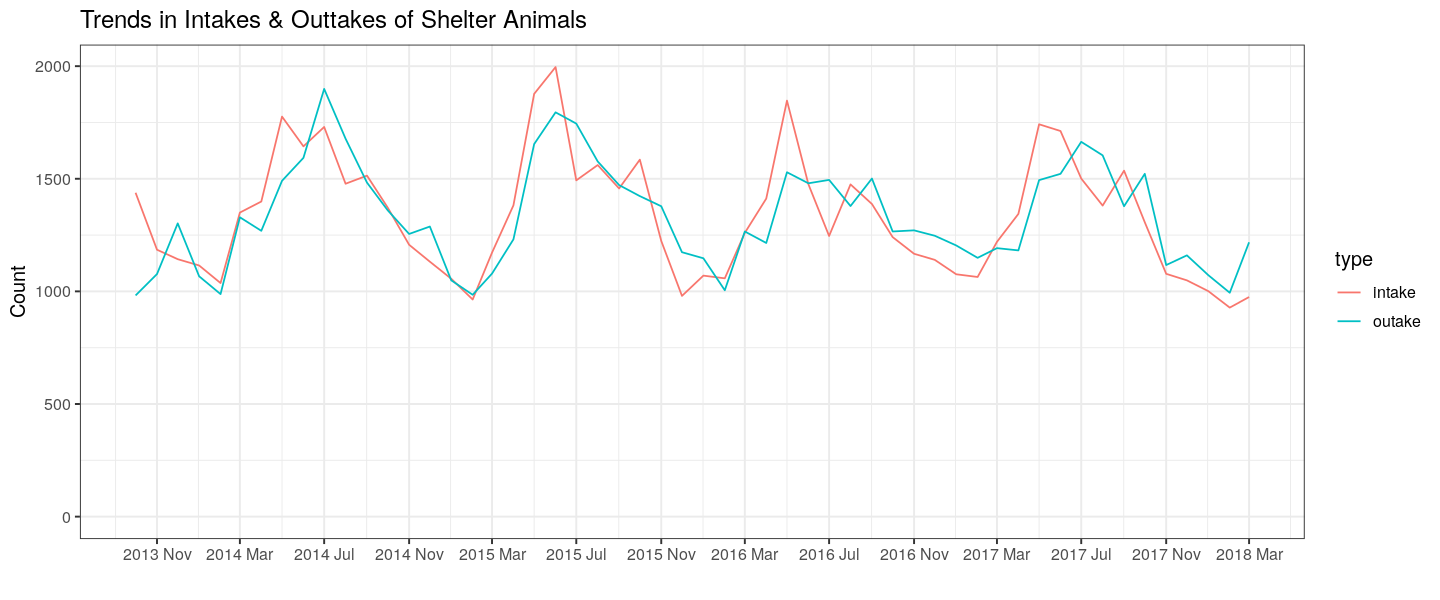

In [3]:
# wrangle the outcome data counts
data_new <- df %>% 
    group_by(intake_monthyear) %>%
    summarise('count' = n()) %>%
    mutate('type' = 'intake',
          'monthyear' = intake_monthyear) 
data_new <- data_new[-1]

# wrangle the outcome data counts
data_new1 <- df %>% 
    group_by(outcome_monthyear) %>%
    summarise('count' = n()) %>%
    mutate('type' = 'outake',
          'monthyear' = outcome_monthyear)
data_new1 <- data_new1[-1]

# join outcome and income counts 
counts_data <- full_join(data_new, data_new1)
counts_data['year'] <- year(counts_data[['monthyear']])
counts_data <- counts_data[1:108,]

# create line plot
options(repr.plot.width = 12, repr.plot.height = 5)

counts_data %>% ggplot() + 
    geom_line(aes(x=monthyear, y=count, color=type)) + 
    labs(title = 'Trends in Intakes & Outtakes of Shelter Animals',
         x = "",
         y = "Count") +
    expand_limits(y=0) +
    scale_x_datetime(date_labels = format('%Y %b'), date_breaks = "4 months") +
    theme_bw(base_size = 12) 
    

In [6]:
year_range=c(2013,2015)

counts_data %>%
    filter(year >= year_range[1] & year <= year_range[2])

count,type,monthyear,year
<int>,<chr>,<dttm>,<dbl>
1438,intake,2013-10-01,2013
1185,intake,2013-11-01,2013
1143,intake,2013-12-01,2013
1115,intake,2014-01-01,2014
1037,intake,2014-02-01,2014
1350,intake,2014-03-01,2014
1399,intake,2014-04-01,2014
1776,intake,2014-05-01,2014
1644,intake,2014-06-01,2014


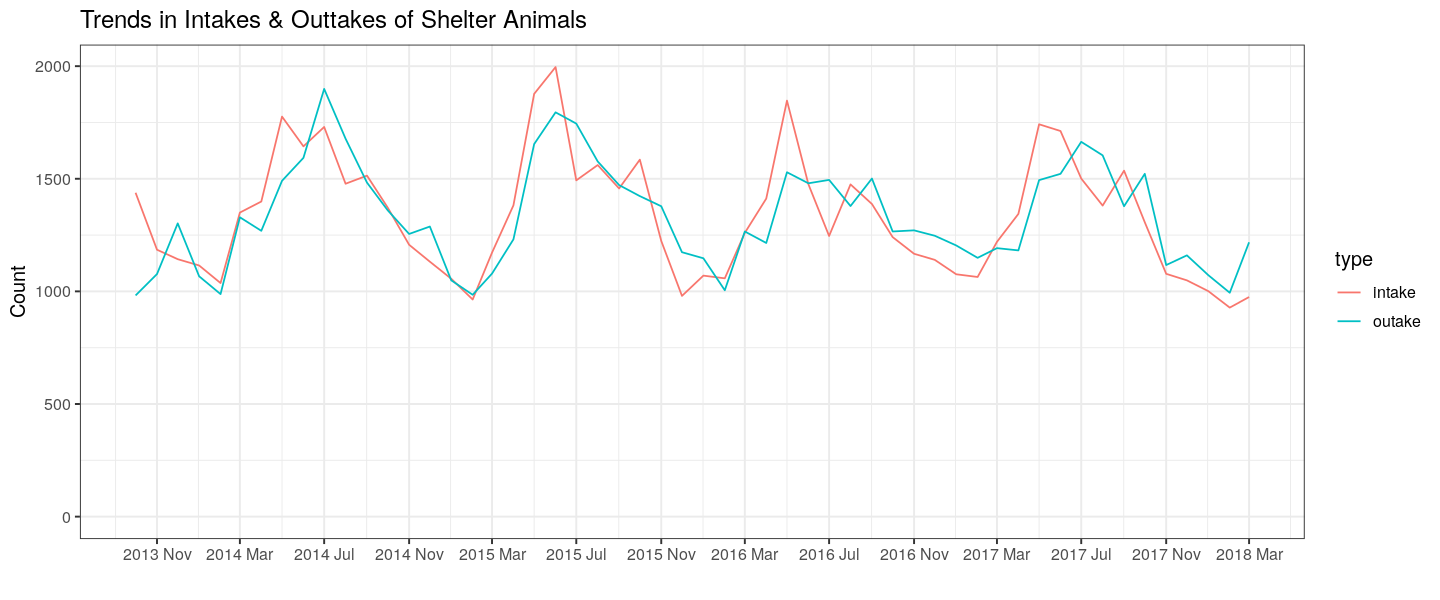

In [80]:
options(repr.plot.width = 12, repr.plot.height = 5)
counts_data %>% ggplot() + 
    geom_line(aes(x=monthyear, y=count, color=type)) + 
    labs(title = 'Trends in Intakes & Outtakes of Shelter Animals',
         x = "",
         y = "Count") +
    expand_limits(y=0) +
    scale_x_datetime(date_labels = format('%Y %b'), date_breaks = "4 months") +
    theme_bw(base_size = 12) 
    

In [85]:
ggsave("plot1_sketch.png", width = 4, height = 2)